# 03 Exploratory Data Analysis

## Imports & Functions

In [179]:
import pandas as pd
import json
import pickle  

In [180]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from string import punctuation
%matplotlib inline

## Load Clean DataFrame for EDA

In [181]:
with open('../Data/df_clean.pkl', 'rb') as f:
    df = pickle.load(f)

## Compare Auxiliary Features Between Sub-Reddits

In [182]:
df.groupby('subreddit')\
['score','num_comments','over_18','title_len','text_len','title_only'].mean().copy()

,score,num_comments,over_18,title_len,text_len,title_only
subreddit,,,,,,
Jokes,371.231491,10.846715,0.062565,48.014599,198.992701,0.001043
confessions,42.442987,13.180626,0.017154,54.781029,685.320888,0.107972


<function matplotlib.pyplot.tight_layout>

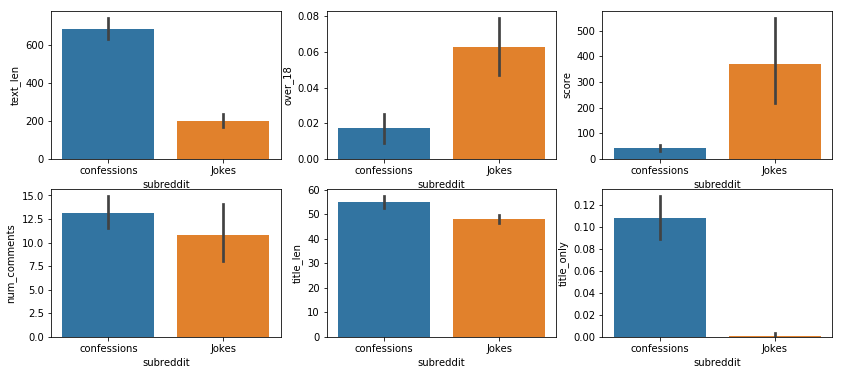

In [183]:
##TODO:  Turn this into a loop, for each auxiliary feature
fig = plt.figure(figsize=(14,6))
fig.add_subplot(231)
sns.barplot(x='subreddit', y='text_len', data=df)
fig.add_subplot(232)
sns.barplot(x='subreddit', y='over_18', data=df)
fig.add_subplot(233)
sns.barplot(x='subreddit', y='score', data=df)
fig.add_subplot(234)
sns.barplot(x='subreddit', y='num_comments', data=df)
fig.add_subplot(235)
sns.barplot(x='subreddit', y='title_len', data=df)
fig.add_subplot(236)
sns.barplot(x='subreddit', y='title_only', data=df)

plt.tight_layout

## Compare Text Data Between SubReddits

### Split Text Data by SubReddit

In [184]:
_stopwords = set(list(ENGLISH_STOP_WORDS)+list(punctuation) + ['ve','wa','don']) 

In [185]:
confessions_text = list(df[df.subreddit=='confessions'].title + ' ' + df[df.subreddit=='confessions'].selftext)
jokes_text = list(df[df.subreddit=='Jokes'].title + ' ' + df[df.subreddit=='Jokes'].selftext)

In [186]:
cvec_confessions = CountVectorizer(stop_words=_stopwords)
cvec_confessions.fit(confessions_text)
confessions_df_vec = pd.SparseDataFrame(cvec_confessions.transform(confessions_text), 
                                        columns = cvec_confessions.get_feature_names(), 
                                        default_fill_value=0)
confessions_top_words = pd.DataFrame(confessions_df_vec.sum(),
                                     columns = ['count']).sort_values('count', ascending=False)
confessions_top_words['word'] = confessions_top_words.index

In [187]:
cvec_jokes = CountVectorizer(stop_words=_stopwords)
cvec_jokes.fit(jokes_text)
jokes_df_vec = pd.SparseDataFrame(cvec_jokes.transform(jokes_text), 
                                        columns = cvec_jokes.get_feature_names(), 
                                        default_fill_value=0)
jokes_top_words = pd.DataFrame(jokes_df_vec.sum(),
                               columns = ['count']).sort_values('count', ascending=False)
jokes_top_words['word'] = jokes_top_words.index

## Visualize Top 20 Words for Each Sub-Reddit

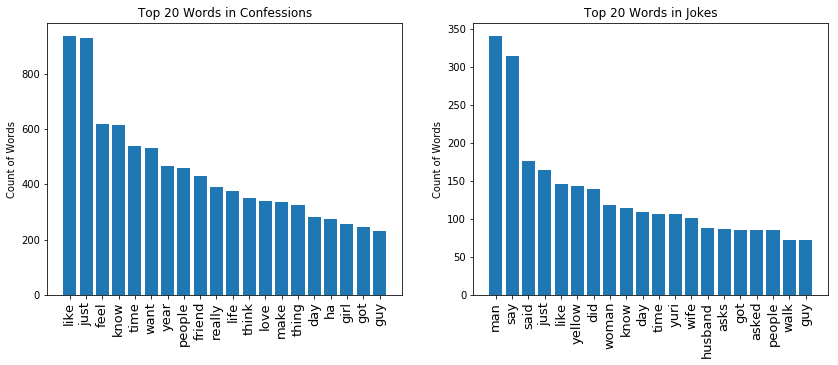

In [197]:
x = range(20)
fig = plt.figure(figsize=(14,5))
fig.add_subplot(121)
plt.bar(x, confessions_top_words['count'][:20])
plt.xticks(x, confessions_top_words['word'][:20], rotation='vertical', fontsize=13)
plt.title('Top 20 Words in Confessions')
plt.ylabel('Count of Words')

fig.add_subplot(122)

plt.bar(x, jokes_top_words['count'][:20])
plt.xticks(x, jokes_top_words['word'][:20], rotation='vertical', fontsize=13)
plt.title('Top 20 Words in Jokes')
plt.ylabel('Count of Words');
